# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['hobart',
 'ushuaia',
 'saint george',
 'georgetown',
 'bluff',
 'lebu',
 'qaanaaq',
 'kegayli',
 'albany',
 'mataura',
 'tura',
 'sentyabrskiy',
 'tuktoyaktuk',
 'haines junction',
 'alofi',
 'harper',
 'illoqqortoormiut',
 'karratha',
 'new norfolk',
 'torbay',
 'bengkulu',
 'rundu',
 'magistralnyy',
 'cabo san lucas',
 'bagan',
 'vaini',
 'mufulira',
 'kaitangata',
 'kapit',
 'felipe carrillo puerto',
 'chuy',
 'barrow',
 'bemidji',
 'punta arenas',
 'botou',
 'puerto ayora',
 'avarua',
 'bandarbeyla',
 'puerto baquerizo moreno',
 'alta floresta',
 'pinyug',
 'port alfred',
 'kieta',
 'bambous virieux',
 'hermanus',
 'mareeba',
 'san patricio',
 'shevchenkove',
 'preobrazheniye',
 'dikson',
 'puerto escondido',
 'madang',
 'serchhip',
 'barbar',
 'tasiilaq',
 'camapua',
 'vaitape',
 'khatanga',
 'portland',
 'rikitea',
 'hervey bay',
 'santa helena de goias',
 'tezu',
 'rangapara',
 'nizhneyansk',
 'kuche',
 'leningradskiy',
 'camacha',
 'richmond',
 'miquelon',
 'nyurba',
 'lompoc

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
farenheit = 'units='

query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'

response = requests.get(query_url).json()
response

{'coord': {'lon': 168.8643, 'lat': -46.1927},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 76.87,
  'feels_like': 74.8,
  'temp_min': 76.87,
  'temp_max': 76.87,
  'pressure': 1005,
  'humidity': 35,
  'sea_level': 1005,
  'grnd_level': 998},
 'visibility': 10000,
 'wind': {'speed': 2.51, 'deg': 50},
 'rain': {'1h': 2.05},
 'clouds': {'all': 95},
 'dt': 1612757849,
 'sys': {'country': 'NZ', 'sunrise': 1612720100, 'sunset': 1612771750},
 'timezone': 46800,
 'id': 6201424,
 'name': 'Mataura',
 'cod': 200}

In [4]:
name = []
country = []
lat = []
lng = []
temp_max = []
humid = []
clouds = []
wind = []
date = []

for city in cities:
    
    query_url = f'{base_url}{city}&units=imperial&appid={weather_api_key}'
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Retrieving Results for {city}. Appending stats.")
        
    except:
        print(f'{city} not found.')
        pass
        

Retrieving Results for hobart. Appending stats.
Retrieving Results for ushuaia. Appending stats.
Retrieving Results for saint george. Appending stats.
Retrieving Results for georgetown. Appending stats.
Retrieving Results for bluff. Appending stats.
Retrieving Results for lebu. Appending stats.
Retrieving Results for qaanaaq. Appending stats.
kegayli not found.
Retrieving Results for albany. Appending stats.
Retrieving Results for mataura. Appending stats.
Retrieving Results for tura. Appending stats.
sentyabrskiy not found.
Retrieving Results for tuktoyaktuk. Appending stats.
Retrieving Results for haines junction. Appending stats.
Retrieving Results for alofi. Appending stats.
Retrieving Results for harper. Appending stats.
illoqqortoormiut not found.
Retrieving Results for karratha. Appending stats.
Retrieving Results for new norfolk. Appending stats.
Retrieving Results for torbay. Appending stats.
Retrieving Results for bengkulu. Appending stats.
Retrieving Results for rundu. Appen

Retrieving Results for safita. Appending stats.
Retrieving Results for klaksvik. Appending stats.
Retrieving Results for clyde river. Appending stats.
Retrieving Results for two hills. Appending stats.
Retrieving Results for beloha. Appending stats.
Retrieving Results for peniche. Appending stats.
Retrieving Results for tiksi. Appending stats.
Retrieving Results for maraba. Appending stats.
Retrieving Results for santiago del estero. Appending stats.
Retrieving Results for saint-augustin. Appending stats.
grand river south east not found.
Retrieving Results for zhigansk. Appending stats.
barentsburg not found.
Retrieving Results for ventanas. Appending stats.
Retrieving Results for krutinka. Appending stats.
Retrieving Results for airai. Appending stats.
Retrieving Results for dwarka. Appending stats.
Retrieving Results for thompson. Appending stats.
Retrieving Results for ponta do sol. Appending stats.
Retrieving Results for hualmay. Appending stats.
Retrieving Results for phan thiet.

Retrieving Results for fortuna. Appending stats.
Retrieving Results for iwanai. Appending stats.
Retrieving Results for bull savanna. Appending stats.
Retrieving Results for kavieng. Appending stats.
Retrieving Results for tiznit. Appending stats.
Retrieving Results for marsaxlokk. Appending stats.
Retrieving Results for lovington. Appending stats.
Retrieving Results for bowen. Appending stats.
Retrieving Results for isangel. Appending stats.
samusu not found.
Retrieving Results for kuantan. Appending stats.
Retrieving Results for sembakung. Appending stats.
Retrieving Results for oyem. Appending stats.
Retrieving Results for sebu. Appending stats.
Retrieving Results for codrington. Appending stats.
meyungs not found.
Retrieving Results for zhezkazgan. Appending stats.
Retrieving Results for ilulissat. Appending stats.
Retrieving Results for hithadhoo. Appending stats.
Retrieving Results for husavik. Appending stats.
Retrieving Results for tortoli. Appending stats.
Retrieving Results f

Retrieving Results for bitung. Appending stats.
ust-kamchatsk not found.
Retrieving Results for akhtubinsk. Appending stats.
jujuy not found.
Retrieving Results for koster. Appending stats.
Retrieving Results for graaff-reinet. Appending stats.
Retrieving Results for vardo. Appending stats.
Retrieving Results for egvekinot. Appending stats.
Retrieving Results for markova. Appending stats.
rungata not found.
Retrieving Results for ranghulu. Appending stats.
Retrieving Results for west freehold. Appending stats.
Retrieving Results for sibut. Appending stats.
Retrieving Results for maceio. Appending stats.
Retrieving Results for santo tomas. Appending stats.
Retrieving Results for korla. Appending stats.
Retrieving Results for neropolis. Appending stats.
Retrieving Results for akcaabat. Appending stats.
Retrieving Results for mangai. Appending stats.
Retrieving Results for shache. Appending stats.
Retrieving Results for narragansett. Appending stats.
Retrieving Results for chissamba. Appe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
weather_df = pd.DataFrame({
    'City': name,
    'Country': country,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Date': date,
})
    
weather_df.to_csv("output_data/weather_data.csv")
    
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Hobart,AU,-42.8794,147.3294,68.00,42,75,18.41,1612757559
1,Ushuaia,AR,-54.8000,-68.3000,51.80,82,75,2.30,1612757811
2,Saint George,US,37.1041,-113.5841,53.01,29,1,3.44,1612757710
3,George Town,MY,5.4112,100.3354,89.60,51,20,5.75,1612757850
4,Bluff,NZ,-46.6000,168.3333,61.25,72,100,12.39,1612757850
...,...,...,...,...,...,...,...,...,...
572,Buala,SB,-8.1450,159.5921,85.01,77,85,10.42,1612758017
573,Kungurtug,RU,50.5994,97.5228,16.97,87,100,1.32,1612758017
574,Zyryanka,RU,65.7500,150.8500,-17.95,86,99,19.71,1612758017
575,Tignère,CM,7.3667,12.6500,62.33,29,97,2.01,1612758017


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# weather_df.dtypes

# weather_df.loc[weather_df['Humidity'] > 100]

# just in case
weather_df['Humidity'].sort_values(ascending=False)
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Hobart,AU,-42.8794,147.3294,68.00,42,75,18.41,1612757559
1,Ushuaia,AR,-54.8000,-68.3000,51.80,82,75,2.30,1612757811
2,Saint George,US,37.1041,-113.5841,53.01,29,1,3.44,1612757710
3,George Town,MY,5.4112,100.3354,89.60,51,20,5.75,1612757850
4,Bluff,NZ,-46.6000,168.3333,61.25,72,100,12.39,1612757850
...,...,...,...,...,...,...,...,...,...
572,Buala,SB,-8.1450,159.5921,85.01,77,85,10.42,1612758017
573,Kungurtug,RU,50.5994,97.5228,16.97,87,100,1.32,1612758017
574,Zyryanka,RU,65.7500,150.8500,-17.95,86,99,19.71,1612758017
575,Tignère,CM,7.3667,12.6500,62.33,29,97,2.01,1612758017


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

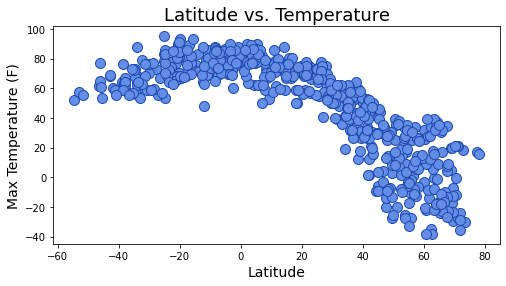

In [8]:
lat_x = weather_df['Lat']
temp_y = weather_df['Max Temp']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Temperature', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.show()

## Latitude vs. Humidity Plot

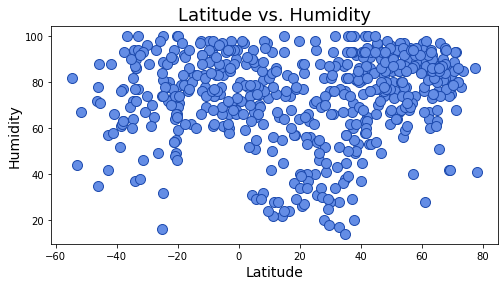

In [9]:
lat_x = weather_df['Lat']
humid_y = weather_df['Humidity']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, humid_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Humidity', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.show()

## Latitude vs. Cloudiness Plot

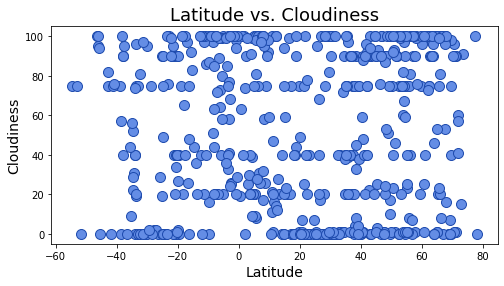

In [10]:
lat_x = weather_df['Lat']
cloud_y = weather_df['Cloudiness']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, cloud_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Cloudiness', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.show()

## Latitude vs. Wind Speed Plot

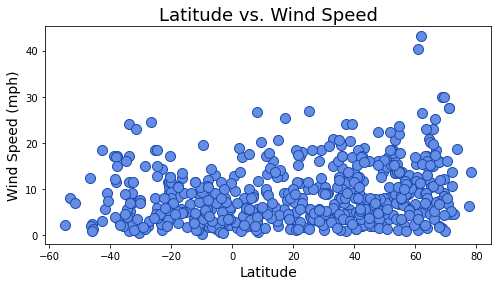

In [11]:
lat_x = weather_df['Lat']
wind_y = weather_df['Wind Speed']

plt.figure(figsize=(8, 4))
plt.scatter(lat_x, wind_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Latitude vs. Wind Speed', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.show()

## Linear Regression

In [12]:
northern_df = weather_df.loc[weather_df['Lat'] > 0]
# northern_df

southern_df = weather_df.loc[weather_df['Lat'] < 0]
# southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

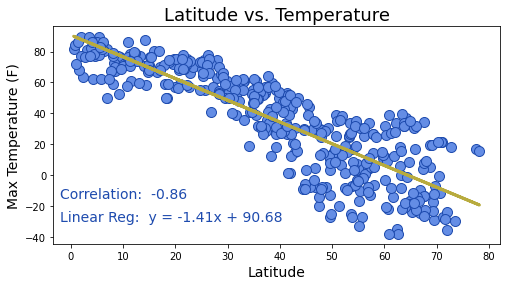

In [13]:
n_lat_x = northern_df['Lat']
n_temp_y = northern_df['Max Temp']

n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = linregress(n_lat_x, n_temp_y)
n_temp_regression = n_temp_slope * n_lat_x + n_temp_int
n_temp_regression_txt = f'y = {str(round(n_temp_slope,2))}x + {str(round(n_temp_int,2))}'

plt.figure(figsize=(8, 4))
plt.scatter(n_lat_x, n_temp_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(n_lat_x, n_temp_regression, color='#B8AB3E', linewidth=3)
plt.title('Latitude vs. Temperature', fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.annotate(f'Correlation:  {round(n_temp_r, 2)}', (-2,-15), fontsize=14, color='#1e4bae')
plt.annotate(f'Linear Reg:  {n_temp_regression_txt}', (-2,-30), fontsize=14, color='#1e4bae')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression